In [1]:
%matplotlib inline

import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))
sys.path.append(os.path.join(os.getcwd(), '..', '..'))
sys.path.append(os.path.join(os.getcwd(), '..', '..'))
sys.path.append(os.path.join(os.getcwd(), '..', '..', 'analysis'))
sys.path.append(os.path.join(os.getcwd(), '..', '..', 'session'))

import numpy as np
from imports import *
from matplotlib.patches import ConnectionPatch
from scipy.stats import pearsonr
from target import build_tgt_matrix
np.set_printoptions(suppress=True)

import nbimporter
from functions import get_spike_counts, plot_tgt_bgr_psth, plot_psth_by_metric

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## 3.1 Example unit responses to different target / background durations

In [3]:
example_units = {
    '009266_hippoSIT_2023-04-20_08-57-39': [
        '2-3', '2-4', '2-5'
    ],
    '009266_hippoSIT_2023-04-26_08-20-17': [
        '1-2', '1-3', '2-10', '2-12', '2-13', '2-14', '2-15', '2-16', '2-17', '2-2', '2-20',\
        '2-22', '2-25', '2-5', '2-6', '2-7'
    ],
    '009266_hippoSIT_2023-05-04_19-47-15': [
        '1-10', '1-11', '1-12', '1-13', '1-14', '1-15', '1-16', '1-19', '1-2', '1-20', \
        '1-21', '1-23', '1-28', '1-3', '1-30', '1-4', '1-8', '2-10', '2-11', '2-12', \
        '2-13', '2-15', '2-2', '2-3', '2-5', '2-7', '2-8'
    ],
}

unit_count = np.array([len(vals) for vals in example_units.values()]).sum()
unit_count

46

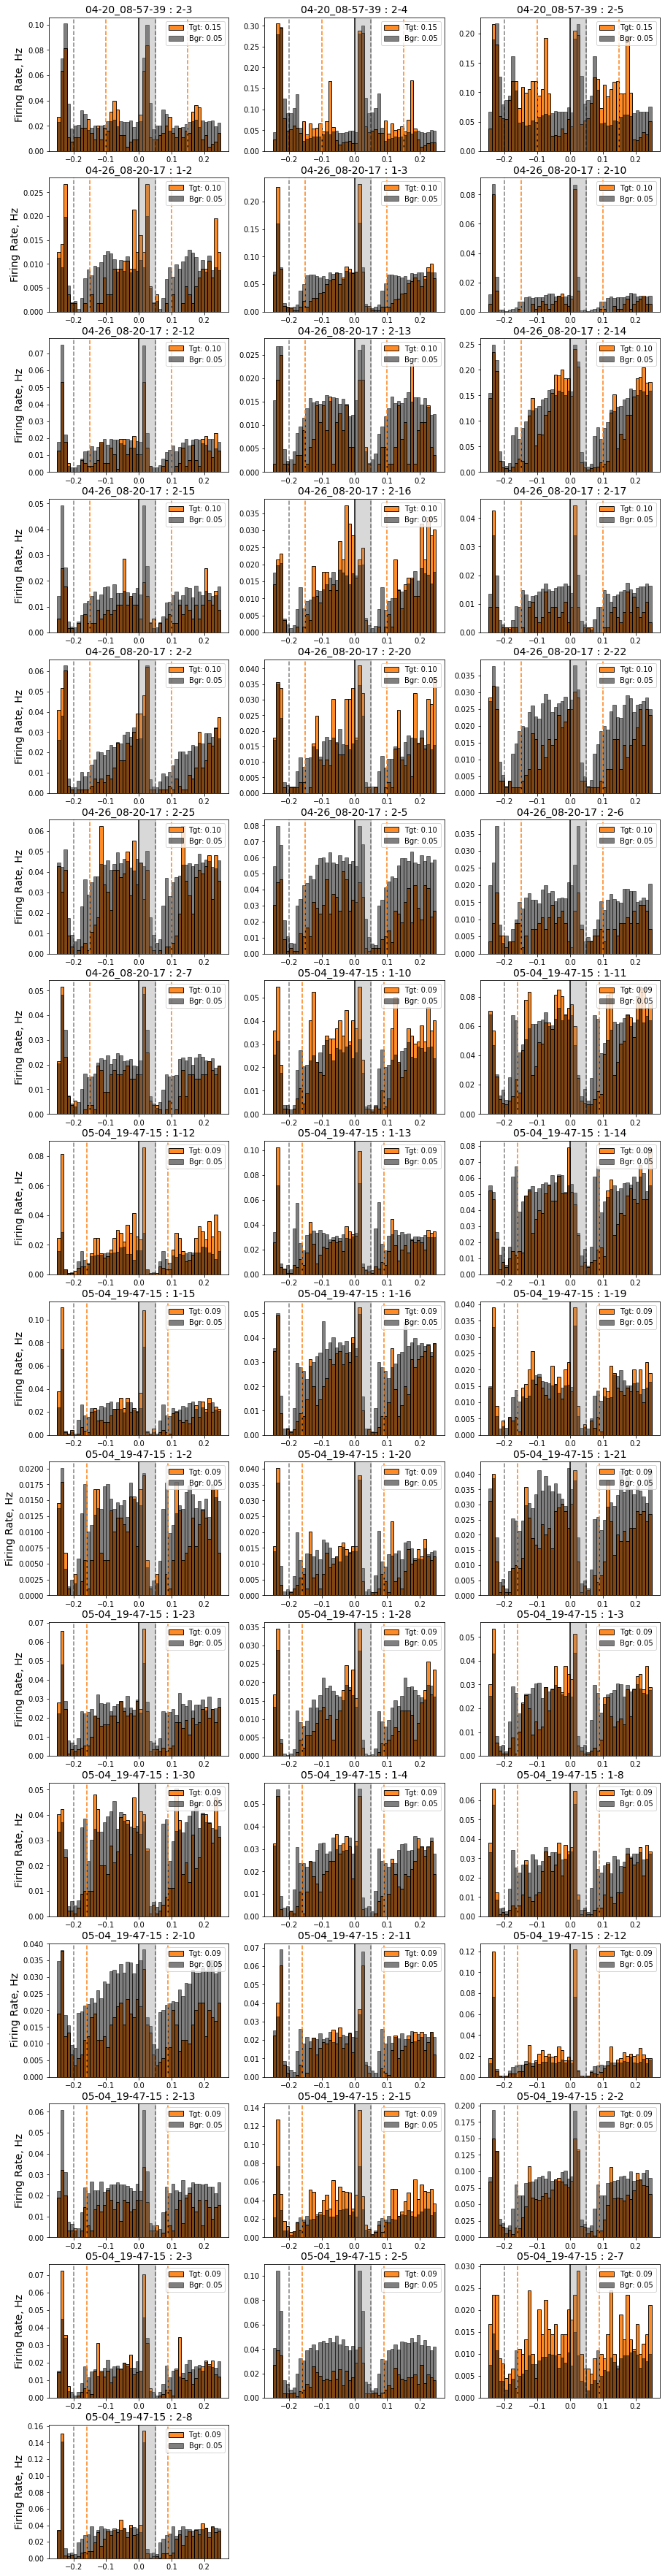

In [4]:
fig = plot_tgt_bgr_psth(example_units)

### Figure notes: response micro-structure is modulated by tone duration

    Neuronal responses (PSTH) to target (yellow) / backgound (gray) for selected neurons.
    Gray and yellow vertical dashed lines indicate background and target pulse durations.
    Note modulation by the relevant sound differ in time relative to the pulse offset. 
    Note locking of the "off" response to the pulse duration (2-3, 2-4, 2-5 (tgt 0.15), 1-3, 1-30, 2-2 (tgt 0.09)).

## AEP P1 state is modulated by ON-phase responsive units (even diff durations)

In [3]:
example_units = {
    '009266_hippoSIT_2023-04-20_08-57-39': [
        '2-4'
    ],
    '009266_hippoSIT_2023-04-26_08-20-17': [
        '1-3', '2-10', '2-11', '2-12', '2-15', '2-18', '2-19', '2-23', '2-24',\
        '2-25', '2-7', '2-9', '2-3', 
    ],
    '009266_hippoSIT_2023-05-04_19-47-15': [
        '1-12', '1-13', '1-15', '1-16', '1-17', '1-18', '1-19', \
        '1-20', '1-22', '1-23', '1-24', '1-25', '1-28', '1-29', '1-3', '1-31', '1-4', \
        '1-8', '2-11', '2-12', '2-14', '2-4', '2-6', '2-8'
    ],
}

unit_count = np.array([len(vals) for vals in example_units.values()]).sum()
unit_count

38

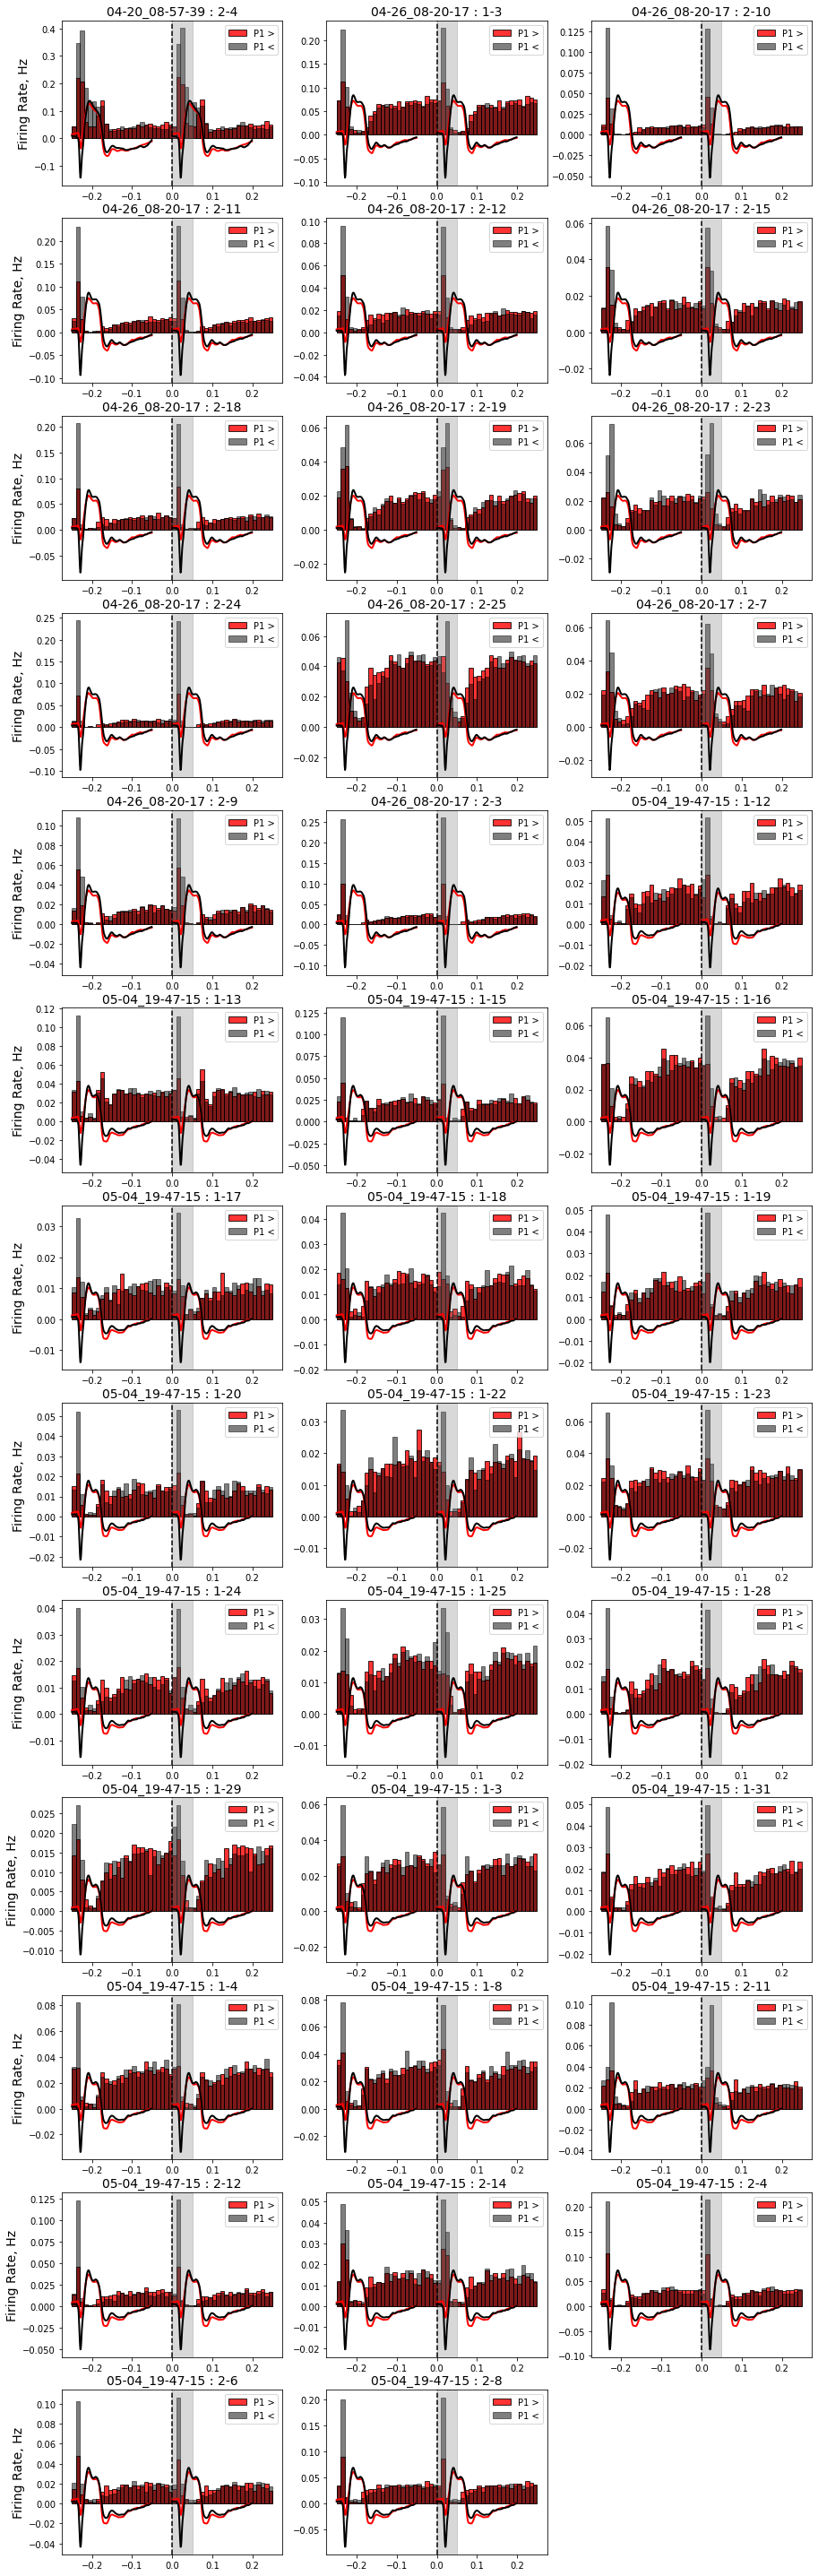

In [4]:
fig = plot_psth_by_metric('A1', 'P1', example_units)

## AEP N1 state modulates late response components

In [5]:
example_units = {
    '009266_hippoSIT_2023-04-20_08-57-39': [
        '2-2'
    ],
    '009266_hippoSIT_2023-04-26_08-20-17': [
        '2-13', '2-21', '2-22', '2-5', '2-6'
    ],
    '009266_hippoSIT_2023-05-04_19-47-15': [
        '1-10', '1-12', '1-14', '1-18', '1-23', '1-26', '1-7', '1-9', \
        '2-10', '2-13', '2-15', '2-5', '2-7'
    ],
}

unit_count = np.array([len(vals) for vals in example_units.values()]).sum()
unit_count

19

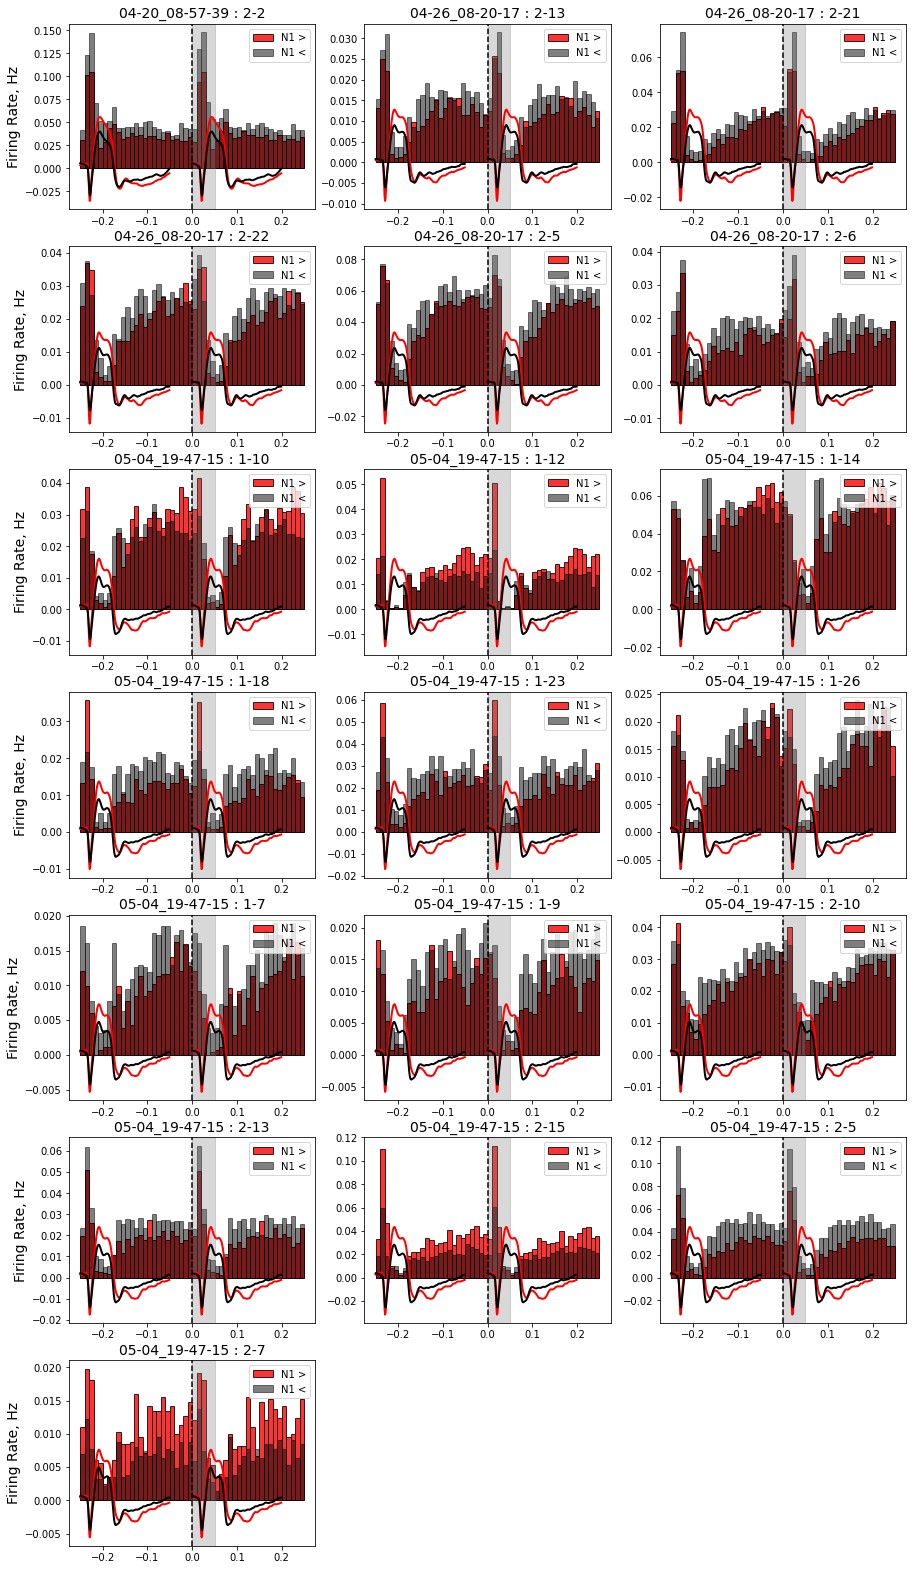

In [6]:
fig = plot_psth_by_metric('A1', 'N1', example_units)